# * 과제

### 텍스트

- 단어 빈도

- 주제

- 감정분석(분류)


### 이미지

- 분류 

Ex) 
- 회사 홈페이지 댓글의 상품별 단어 빈도
- 포스터 리뷰점수

 *** 간단하게

# # 인공신경망

# 10.1. 퍼셉트론

# 10.2. 활성화 함수

# 10.3. 다층 퍼셉트론

# 10.4. 역전파 알고리즘

# 10.5. 보편적 근사 정리

# 10.6. 심층 신경망 또는 딥러닝

# 10.7. 딥러닝이 가능한 이유

# 10.8. 로지스틱 회귀 분석 모형

In [2]:
from urllib.request import urlretrieve
from zipfile import ZipFile


urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip',
            'dog-vs-cat.zip')

with ZipFile('dog-vs-cat.zip') as z:
    z.extractall()

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator().flow_from_directory(
    'dog-vs-cat/train',
    target_size=(100, 100),
    class_mode='binary')

valid = ImageDataGenerator().flow_from_directory(
    'dog-vs-cat/validation',
    target_size=(100, 100),
    class_mode='binary',
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [5]:
from keras import Sequential
from keras.layers import Dense, Flatten

In [6]:
m1 = Sequential()
m1.add(Flatten(input_shape=(100, 100, 3)))
m1.add(Dense(1, activation='sigmoid'))

In [7]:
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.optimizers import Adam, RMSprop

In [9]:
m1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [10]:
history1 = m1.fit_generator(train, validation_data=valid, epochs=5)

Epoch 1/5
63/63 [==============================] - 9s 148ms/step - loss: 8.0297 - acc: 0.5010 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
63/63 [==============================] - 7s 109ms/step - loss: 8.0669 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
63/63 [==============================] - 7s 117ms/step - loss: 8.0748 - acc: 0.4990 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
63/63 [==============================] - 7s 116ms/step - loss: 8.0669 - acc: 0.4995 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
63/63 [==============================] - 7s 109ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

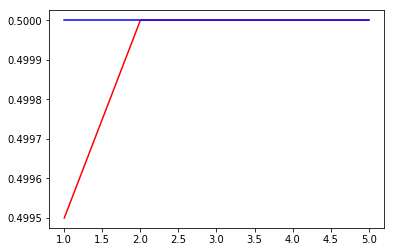

In [16]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

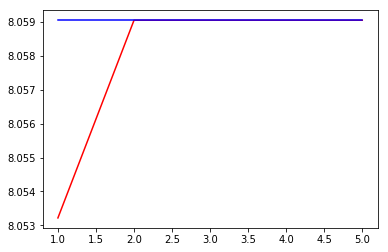

In [14]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

# 10.9. 스케일링

In [17]:
train = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    'dog-vs-cat/train',
    target_size=(100, 100),
    class_mode='binary')

valid = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    'dog-vs-cat/validation',
    target_size=(100, 100),
    class_mode='binary',
    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [18]:
m2 = Sequential()
m2.add(Flatten(input_shape=(100, 100, 3)))
m2.add(Dense(1, activation='sigmoid'))

In [19]:
m2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())
history2 = m2.fit_generator(train, validation_data=valid, epochs=5)

Epoch 1/5
63/63 [==============================] - 9s 143ms/step - loss: 1.0243 - acc: 0.5357 - val_loss: 0.7067 - val_acc: 0.5337
Epoch 2/5
63/63 [==============================] - 7s 114ms/step - loss: 0.8890 - acc: 0.5451 - val_loss: 1.0998 - val_acc: 0.5125
Epoch 3/5
63/63 [==============================] - 7s 114ms/step - loss: 0.7159 - acc: 0.6002 - val_loss: 1.0750 - val_acc: 0.5125
Epoch 4/5
63/63 [==============================] - 7s 115ms/step - loss: 0.8491 - acc: 0.5848 - val_loss: 0.7608 - val_acc: 0.5475
Epoch 5/5
63/63 [==============================] - 7s 116ms/step - loss: 0.8007 - acc: 0.5997 - val_loss: 0.7791 - val_acc: 0.5300


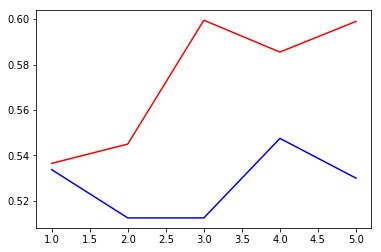

In [20]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

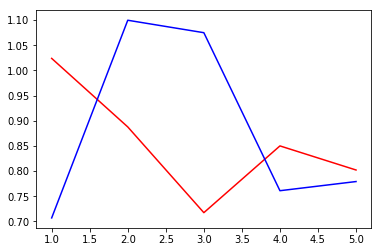

In [21]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

# 10.10. 얼리 스톱핑

In [22]:
from keras.callbacks import EarlyStopping

In [23]:
m3 = Sequential()
m3.add(Flatten(input_shape=(100, 100, 3)))
m3.add(Dense(1, activation='sigmoid'))

m3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [24]:
history3 = m3.fit_generator(train,
                            validation_data=valid,
                            epochs=30,
                            callbacks=[
                                EarlyStopping(monitor = "val_loss", patience=2)
                            ])

Epoch 1/30
63/63 [==============================] - 8s 135ms/step - loss: 0.9901 - acc: 0.5367 - val_loss: 0.7365 - val_acc: 0.5475
Epoch 2/30
63/63 [==============================] - 7s 118ms/step - loss: 0.9960 - acc: 0.5333 - val_loss: 1.0021 - val_acc: 0.5125
Epoch 3/30
63/63 [==============================] - 7s 117ms/step - loss: 0.8130 - acc: 0.5844 - val_loss: 0.7359 - val_acc: 0.5425
Epoch 4/30
63/63 [==============================] - 7s 118ms/step - loss: 0.6415 - acc: 0.6270 - val_loss: 0.7381 - val_acc: 0.5525
Epoch 5/30
63/63 [==============================] - 7s 108ms/step - loss: 0.7098 - acc: 0.6230 - val_loss: 0.8178 - val_acc: 0.5312


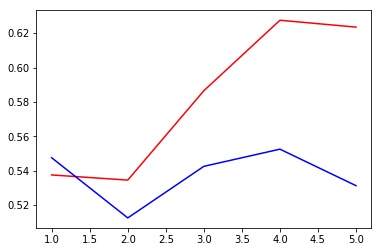

In [25]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

# 10.11. 다층신경망

In [26]:
m4 = Sequential()
m4.add(Flatten(input_shape=(100, 100, 3)))
m4.add(Dense(100, activation='relu'))
m4.add(Dense(1, activation='sigmoid'))

In [27]:
m4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               3000100   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 3,000,201
Trainable params: 3,000,201
Non-trainable params: 0
_________________________________________________________________


In [28]:
m4.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.0001))

In [29]:
history4 = m4.fit_generator(train,
                            validation_data=valid,
                            epochs=30,
                            callbacks=[
                                EarlyStopping(monitor = "val_loss", patience=2)
                            ]
                            )

Epoch 1/30
63/63 [==============================] - 11s 173ms/step - loss: 0.7549 - acc: 0.5114 - val_loss: 0.6819 - val_acc: 0.5737
Epoch 2/30
63/63 [==============================] - 10s 152ms/step - loss: 0.7003 - acc: 0.5263 - val_loss: 0.6805 - val_acc: 0.5625
Epoch 3/30
63/63 [==============================] - 10s 153ms/step - loss: 0.6802 - acc: 0.5650 - val_loss: 0.6859 - val_acc: 0.5450
Epoch 4/30
63/63 [==============================] - 10s 152ms/step - loss: 0.6648 - acc: 0.6136 - val_loss: 0.6847 - val_acc: 0.5587


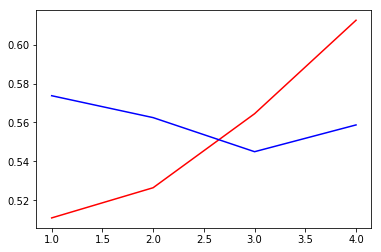

In [30]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')


# 10.12. 모형의 저장, 불러오기, 예측

In [31]:
m4.save('m4.krs')

In [32]:
from keras.models import load_model

In [33]:
m5 = load_model('m4.krs')

In [34]:
prob = m5.predict_generator(valid)

In [35]:
import numpy

In [38]:
pred = numpy.where(prob > .5, 1, 0)

In [39]:
pred[:10]

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0]])

In [40]:
pred = numpy.where(prob > .5, 'dog', 'cat')

In [41]:
pred[:10]

array([['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['cat'],
       ['cat'],
       ['dog'],
       ['dog'],
       ['cat']],
      dtype='<U3')

### # colab 

In [ ]:
from google.colab import files

files.download('model4.krs')